In [ ]:
import seaborn as sns  # for data visualization
import matplotlib.pyplot as plt
import numpy as np  # for operations on data
import pandas as pd  # for loading dataset
from sklearn.impute import SimpleImputer  # for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split  # for splitting dataset
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix



In [ ]:
df=pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
df1=df.copy(deep=True)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop={}
temp=set()
for i in df["label"]:
  temp.add(i)
index=0
for k in sorted(list(temp)):
  if k not in dict:
    crop[index]=k
    index+=1


In [ ]:
print(crop)

{0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
num_cols = df[["N","K","P","ph","humidity","rainfall","temperature"]]
cat_cols = df[["label"]]

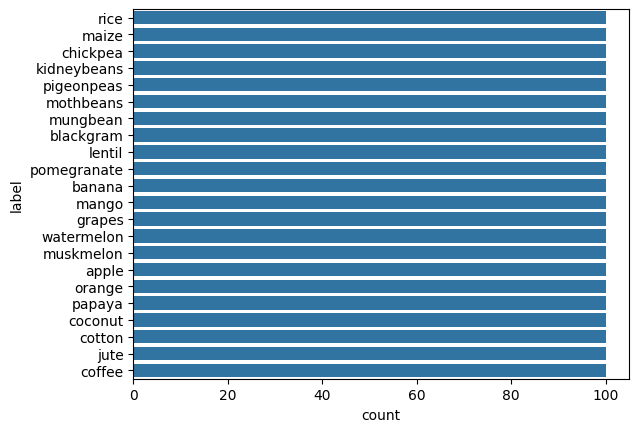

In [ ]:
sb.countplot(y="label", data=df)
plt.show()

In [ ]:
#Categorical Values
print(df['label'])

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
#Numerical Values
print(df['label'])

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64


In [ ]:
a=df.corr()
a.style.background_gradient()

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
label,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


<Axes: >

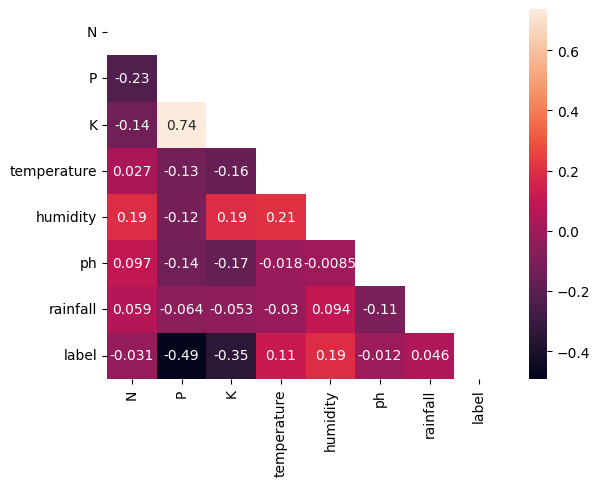

In [ ]:
sb.heatmap(a,annot=True,mask=np.triu(a))

In [ ]:
def outlier_analysis(f_q, t_q):
    shape_first = num_cols.shape[0] # get initial no. of rows (row size,col size)
    col='ph'
    Q1 = num_cols[col].quantile(f_q) # First Quartile
    Q3 = num_cols[col].quantile(t_q) # Third Quartile
    IQR = Q3 - Q1 # interquartile range
    min_ = Q1 - 1.5 * IQR # for non-outliers Q1-1.5IQR<=X<=Q3+1.5IQR
    max_ = Q3 + 1.5 * IQR
    filter_ = (num_cols[col] < min_) | (num_cols[col] > max_) # get col withb corresponding bool
    if num_cols.loc[filter_].any(axis = None): # check for outlier in any row
        cat_cols.drop(num_cols.loc[filter_].index, inplace=True) # .index retrieves row no.
        num_cols.drop(num_cols.loc[filter_].index, inplace=True) # separately drop then combine
    else:
        print(f"There is no outlier for {col} column.")
    shape_last = num_cols.shape[0]
    outlier_percentage = ((shape_first - shape_last) / shape_first) * 100
    print("{:.2f}% observations have been dropped as outlier.".format(outlier_percentage))
outlier_analysis(0.2, 0.8) # we can customize the definition for quartiles
df = pd.concat([num_cols,cat_cols], axis=1)

1.36% observations have been dropped as outlier.


<ipython-input-88-09e70c8967a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols.drop(num_cols.loc[filter_].index, inplace=True) # .index retrieves row no.
<ipython-input-88-09e70c8967a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_cols.drop(num_cols.loc[filter_].index, inplace=True) # separately drop then combine


In [ ]:
le = LabelEncoder() #Create object for class to access its functions
df['label'] = le.fit_transform(df['label'])
df.tail(5)

,N,K,P,ph,humidity,rainfall,temperature,label
2195,107,32,34,6.780064,66.413269,177.774507,26.774637,5
2196,99,27,15,6.086922,56.636362,127.924610,27.417112,5
2197,118,30,33,6.362608,67.225123,173.322839,24.131797,5
2198,117,34,32,6.758793,52.127394,127.175293,26.272418,5
2199,104,30,18,6.779833,60.396475,140.937041,23.603016,5


In [ ]:
x= df.iloc[:, [0,1,2,3,4,5,6]].values
y= df["label"].values
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=100) # 20% test
st_x= StandardScaler() #create object
y_t=y_train
x_train= st_x.fit_transform(x_train) #standardize by shifting mean and scaling SD
x_test= st_x.transform(x_test)
x_test

array([[ 1.86507501,  0.07582936,  1.0267091 , ...,  0.17865519,
         0.26445285,  0.48678633],
       [-0.62789371,  3.01838878,  2.51178762, ...,  0.91908547,
         0.18794326, -0.49980808],
       [-1.11564846,  2.93886015,  2.17840265, ...,  0.81216092,
         0.15787709, -0.64727523],
       ...,
       [-0.57369874, -0.46098891,  0.6630164 , ..., -1.34852847,
         0.809744  ,  0.93072228],
       [ 1.29602781, -0.22240301,  0.02655418, ...,  0.37258768,
         1.69806053, -0.87729065],
       [-0.54660125,  2.93886015,  2.54209534, ...,  0.98389417,
         0.29393655, -0.68030905]])

In [ ]:
y_t

array([19,  3,  9, ..., 20,  4,  0])

In [ ]:
pca=PCA()
pca.fit(x_train)

PCA()

In [ ]:
x_pca=pca.transform(x_train)
x_t_pca=pca.transform(x_test)
x_test

array([[ 1.86507501,  0.07582936,  1.0267091 , ...,  0.17865519,
         0.26445285,  0.48678633],
       [-0.62789371,  3.01838878,  2.51178762, ...,  0.91908547,
         0.18794326, -0.49980808],
       [-1.11564846,  2.93886015,  2.17840265, ...,  0.81216092,
         0.15787709, -0.64727523],
       ...,
       [-0.57369874, -0.46098891,  0.6630164 , ..., -1.34852847,
         0.809744  ,  0.93072228],
       [ 1.29602781, -0.22240301,  0.02655418, ...,  0.37258768,
         1.69806053, -0.87729065],
       [-0.54660125,  2.93886015,  2.54209534, ...,  0.98389417,
         0.29393655, -0.68030905]])

In [ ]:
x_pca.shape

(1736, 7)

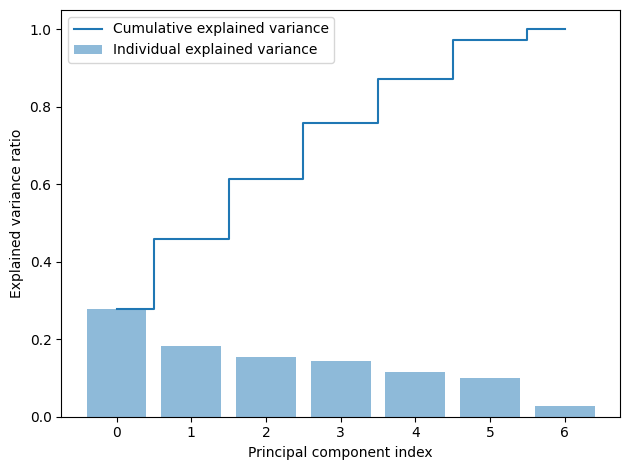

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
def model_train(model):
    model.fit(x_pca, y_train)
    y_pred = model.predict(x_t_pca)
    score = model.score(x_t_pca, y_test)
    print("accuracy ", score)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))  # Corrected this line
    print("precision ", precision_score(y_test, y_pred, average=None))
    print("f_score ", f1_score(y_test, y_pred, average=None))

In [ ]:
model_train(LogisticRegression())

accuracy  0.9838709677419355
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        18
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        23
           4       0.96      1.00      0.98        24
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        24
           8       1.00      0.93      0.97        15
           9       1.00      1.00      1.00        22
          10       0.91      1.00      0.95        21
          11       1.00      1.00      1.00        20
          12       0.96      1.00      0.98        22
          13       1.00      0.83      0.91        12
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        17
          16       1.00      0.94      0.97        1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_train(SVC(kernel = 'linear'))

accuracy  0.9976958525345622
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        22
          10       0.95      1.00      0.98        21
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        22
          13       1.00      0.92      0.96        12
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        1

In [ ]:
model_train(DecisionTreeClassifier(random_state=42))

accuracy  0.9354838709677419
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.94      0.97        18
           2       0.92      0.96      0.94        24
           3       1.00      1.00      1.00        23
           4       0.92      0.96      0.94        24
           5       1.00      1.00      1.00        27
           6       0.83      0.96      0.89        25
           7       1.00      1.00      1.00        24
           8       0.82      0.93      0.87        15
           9       1.00      1.00      1.00        22
          10       0.80      0.95      0.87        21
          11       1.00      0.70      0.82        20
          12       1.00      1.00      1.00        22
          13       0.62      0.83      0.71        12
          14       1.00      0.85      0.92        20
          15       1.00      1.00      1.00        17
          16       1.00      0.88      0.93        1

In [ ]:
model_train(SVC(kernel = 'rbf'))

accuracy  0.9930875576036866
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        24
           8       0.94      1.00      0.97        15
           9       1.00      1.00      1.00        22
          10       0.91      1.00      0.95        21
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        22
          13       1.00      0.83      0.91        12
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        1

In [ ]:
model_train(SVC(kernel = 'poly'))

accuracy  0.9331797235023042
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.94      0.97        18
           2       1.00      0.88      0.93        24
           3       1.00      1.00      1.00        23
           4       0.96      1.00      0.98        24
           5       1.00      0.85      0.92        27
           6       1.00      0.92      0.96        25
           7       1.00      1.00      1.00        24
           8       0.67      0.80      0.73        15
           9       1.00      1.00      1.00        22
          10       0.88      1.00      0.93        21
          11       0.53      1.00      0.69        20
          12       1.00      0.95      0.98        22
          13       1.00      0.75      0.86        12
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        17
          16       1.00      0.88      0.93        1

In [ ]:
print("Enter N K P PH humidity rainfall temparature accordingly")
arr=[float(input()) for i in range(7)]

Enter N K P PH humidity rainfall temparature accordingly
100
23
45
56
4.5
4.7
3.6


In [ ]:
arr=np.array([arr])
arr

array([[100. ,  23. ,  45. ,  56. ,   4.5,   4.7,   3.6]])

In [ ]:
x_i=st_x.transform(arr)
x_i=pca.transform(x_i)
x_i

array([[-17.64039512,  12.63422887, -40.88957981, -27.21390004,
         41.54075985, -13.14485934,   4.11663202]])

In [ ]:
model=SVC(kernel = 'linear')
model.fit(x_pca,y_train)
res=model.predict(x_i)

In [ ]:
print("Ideal crop is ",dict[int(res)])

Ideal crop is  chickpea


<ipython-input-107-fb0fa836f13d>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Ideal crop is ",dict[int(res)])
